In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Here Final is the preprocessed dataset. I already cleaned the reviews and stored them in the CleanedText column .

In [2]:
final=pd.read_csv('final')
final.head(1)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...


### Here I am taking only 2000 positive and negative reviews because of my laptop. If you have powerful pc skip this code.

In [17]:
p=final[final["Score"]==1].sample(n=1000)
n=final[final["Score"]==0].sample(n=1000)
df=pd.concat([p,n])
len(df)

2000

### Splittibg the data.

In [22]:
from sklearn.model_selection import train_test_split
X=df.CleanedText
y=df.Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Converting reviews into vectors

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
df_cv=cv.fit_transform(X_train)

### Training our KNN model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(7)
knn.fit(df_cv,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Predicting the result

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
X_test_bow=cv.transform(X_test)
p=knn.predict(X_test_bow)
print(confusion_matrix(y_test,p))
print('\n')
print(classification_report(y_test,p))

[[150 185]
 [ 80 245]]


             precision    recall  f1-score   support

          0       0.65      0.45      0.53       335
          1       0.57      0.75      0.65       325

avg / total       0.61      0.60      0.59       660



### Doing the same thing using tfidf to convert reviews to vectors to see if there is any improvement in accuracy.

In [23]:
p=final[final["Score"]==1].sample(n=1000)
n=final[final["Score"]==0].sample(n=1000)
df=pd.concat([p,n])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
vect=TfidfVectorizer(ngram_range=(1,2))
tr=TfidfTransformer()
df_vect=vect.fit_transform(X_train)
df_tr=tr.fit_transform(df_vect)
knn.fit(df_tr,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
X_test_vt=vect.transform(X_test)
X_test_tf=tr.transform(X_test_vt)
p=knn.predict(X_test_tf)
print(confusion_matrix(y_test,p))
print('\n')
print(classification_report(y_test,p))

[[231 104]
 [114 211]]


             precision    recall  f1-score   support

          0       0.67      0.69      0.68       335
          1       0.67      0.65      0.66       325

avg / total       0.67      0.67      0.67       660



## Implementation of Kd Tree(you can skip this)

In [27]:
p=final[final["Score"]==1].sample(n=1000)
n=final[final["Score"]==0].sample(n=1000)
df=pd.concat([p,n])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=10, max_features=500)
df_cv=cv.fit_transform(X_train).toarray()

from sklearn.neighbors import KDTree
kd=KDTree(df_cv,leaf_size=4)
dist, ind = kd.query(df_cv[:1], k=3)  
print(ind)
print(dist)

[[   0 1155  584]]
[[0.         5.38516481 5.47722558]]


In [30]:
p=final[final["Score"]==1].sample(n=1000)
n=final[final["Score"]==0].sample(n=1000)
df=pd.concat([p,n])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
vect = TfidfVectorizer(min_df=10, max_features=500)
tr=TfidfTransformer()

v=vect.fit_transform(X_train)
t=tr.fit_transform(v).toarray()


from sklearn.neighbors import KDTree
kd=KDTree(t,leaf_size=4)
dist, ind = kd.query(t[:1], k=3)  
print(ind)
print(dist)

[[   0  584 1155]]
[[0.         0.79937449 0.89802852]]


## Hyperparameter tuning.(we have to find value of k that gives us best results)

## Auc

In [3]:
p=final[final["Score"]==1].sample(n=1000)
n=final[final["Score"]==0].sample(n=1000)
df=pd.concat([p,n])
X=df.CleanedText
y=df.Score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)



## roc curve for train and CV

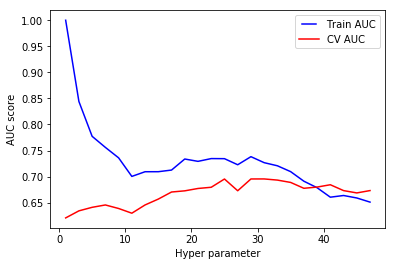

In [4]:
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
from sklearn.neighbors import KNeighborsClassifier
df_cv=cv.fit_transform(X_tr)
X_test_cv=cv.transform(X_cv)
train_result=[]
test_result=[]
neighbour=[]
# calculate the fpr and tpr for all thresholds of the classification
for i in range(1,49,2):
    knn=KNeighborsClassifier(i)
    knn.fit(df_cv,y_tr)
    pre=knn.predict(df_cv)
    fpr,tpr,threshold=metrics.roc_curve(y_tr,pre)
    roc_auc=metrics.auc(fpr,tpr)
    train_result.append(roc_auc)
    
    
    probs=knn.predict(X_test_cv)
    fpr, tpr, threshold = metrics.roc_curve(y_cv, probs)
    roc_auc = metrics.auc(fpr, tpr)
    test_result.append(roc_auc)
    
    neighbour.append(i)
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(neighbour, train_result, 'b', label="Train AUC")
line2, = plt.plot(neighbour, test_result, 'r', label="CV AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Hyper parameter')
plt.show()


### Best K=30(from plot).

## Plotting roc curve of train and test data

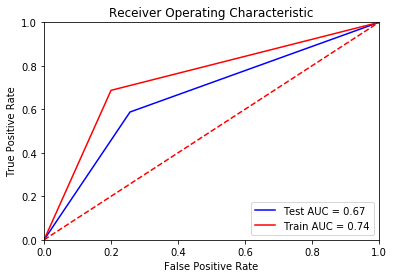

In [5]:
knn=KNeighborsClassifier(30)
X_t=cv.fit_transform(X_train)
knn.fit(X_t,y_train)
pre=knn.predict(X_t)

f,t,threshold=metrics.roc_curve(y_train,pre)
roc_a=metrics.auc(f,t)

X_te=cv.transform(X_test)
p=knn.predict(X_te)

fpr,tpr,threshold=metrics.roc_curve(y_test,p)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)
plt.plot(f, t, 'r', label = 'Train AUC = %0.2f' % roc_a)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

[[249  86]
 [134 191]]
             precision    recall  f1-score   support

          0       0.65      0.74      0.69       335
          1       0.69      0.59      0.63       325

avg / total       0.67      0.67      0.66       660

